# Problem Statement

In order to improve the selection of customers for the credit, we need some prediction model that could help the service provider in further investment and improvement in selection of customers.

To build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

# Description of Data

Variable Definition

label Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn -- mobile number of user

aon -- age on cellular network in days

daily_decr30-- Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90-- Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30-- Average main account balance over last 30 days

rental90-- Average main account balance over last 90 days

last_rech_date_ma-- Number of days till last recharge of main account

last_rech_date_da-- Number of days till last recharge of data account last_rech_amt_ma-- Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30-- Number of times main account got recharged in last 30 days

fr_ma_rech30-- Frequency of main account recharged in last 30 days

sumamnt_ma_rech30-- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30-- Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30-- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90-- Number of times main account got recharged in last 90 days

fr_ma_rech90-- Frequency of main account recharged in last 90 days

sumamnt_ma_rech90-- Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90-- Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90-- Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30-- Number of times data account got recharged in last 30 days

fr_da_rech30-- Frequency of data account recharged in last 30 days

cnt_da_rech90-- Number of times data account got recharged in last 90 days

fr_da_rech90-- Frequency of data account recharged in last 90 days

cnt_loans30-- Number of loans taken by user in last 30 days

amnt_loans30-- Total amount of loans taken by user in last 30 days

maxamnt_loans30-- maximum amount of loan taken by the user in last 30 days

medianamnt_loans30-- Median of amounts of loan taken by the user in last 30 days

cnt_loans90-- Number of loans taken by user in last 90 days

amnt_loans90-- Total amount of loans taken by user in last 90 days

maxamnt_loans90-- maximum amount of loan taken by the user in last 90 days

medianamnt_loans90-- Median of amounts of loan taken by the user in last 90 days

payback30-- Average payback time in days over last 30 days

payback90-- Average payback time in days over last 90 days

pcircle-- telecom circle

pdate-- date



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
#reading csv file
df=pd.read_csv("Data file.csv")

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
#finding first 10 rows of the dataset
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


# Exploratory Data Analysis

In [5]:
#finding information about each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Observation: Here, we can see that mobile number of users i.e. msisdn, pcircle and pdate are having a object datatype. Rest remaining features are having a datatype of int and float.

In [6]:
#finding null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

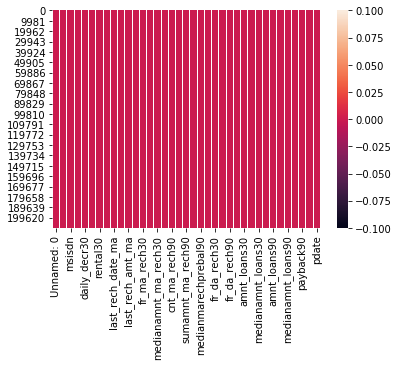

In [8]:
sns.heatmap(df.isnull())

Observation: This shows that there is no null value present in the given data set.

# Descriptive statistic¶
Measure of tendency Measure of spread

In [19]:
#It is used to summarize and describe the features of data to get meaningful insight.
df.describe(exclude=[object])

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observation: Here, we can see that the maximum value of each column is very much higher. That means outliers is present in the given dataset. It also show that the given data is highly skewwed.

We can depict few points from this discriptive chart Observation: 9.Number of days till last recharge of main account: days are ranging from 1 to 7

10.Number of days till last recharge of data account: No information is given in this column

11.Amount of last recharge of main account (in Indonesian Rupiah): average recharge of rupiah is approx 1500.

26: Number of loans taken by user in last 30 days: On an average two loans are taken by account holder.

27.Total amount of loans taken by user in last 30 days: On an average 12 rupiah

28.maximum amount of loan taken by the user in last 30 days: There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

29.Median of amounts of loan taken by the user in last 30 days: 3

30.Number of loans taken by user in last 90 days: on an average people use to take 2 loans

31: Total amount of loans taken by user in last 90 days: The amount varies from 6 to 438. However, average amount is 12. 32: maximum amount of loan taken by the user in last 90 days: on an average 6

33.Median of amounts of loan taken by the user in last 90 days: varies from 0 to 3

34:Average payback time in days over last 30 days: average of 3 days

35.Average payback time in days over last 90 days: average of 4 days.

In [7]:
df.describe(include=[object])

,msisdn,pcircle,pdate
count,209593,209593,209593
unique,186243,1,82
top,04581I85330,UPW,2016-07-04
freq,7,209593,3150


Observation: Here, we can see that there are three features that have object data type. In pcircle there is only one value. So, it doesn't contribute much to the model building. In msisdn there are around 186243 unique values which means there is alot of variation in this feature.

# Finding Categorical and Numerical columns in the dataset¶

In [4]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  34


,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [5]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [6]:
discrete_feature

['label', 'medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90']

In [7]:
df.drop(['pcircle','msisdn','Unnamed: 0'],axis=1,inplace=True)

In [8]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [9]:
#let's reduce the cardinality of date column
df['pdate']=pd.to_datetime(df['pdate'])
df['year']=df['pdate'].dt.year
df['month']=df['pdate'].dt.month
df['day']=df['pdate'].dt.day

In [10]:
df.drop('year',axis=1,inplace=True)

In [11]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25,7,25


In [12]:
df.drop('pdate',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

# Data Visualization

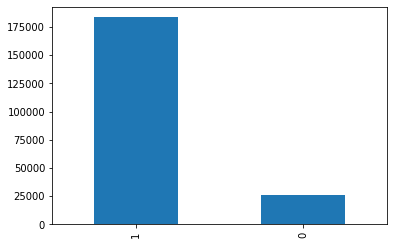

In [14]:
#exploring target variable
df['label'].value_counts().plot(kind='bar')

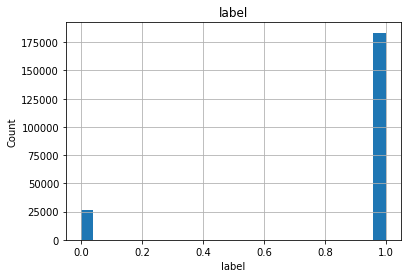

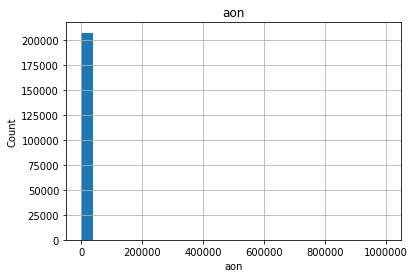

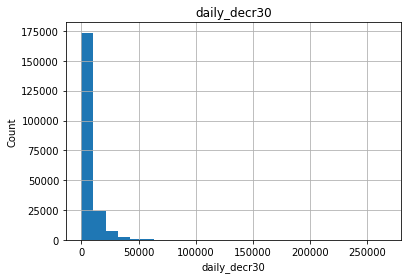

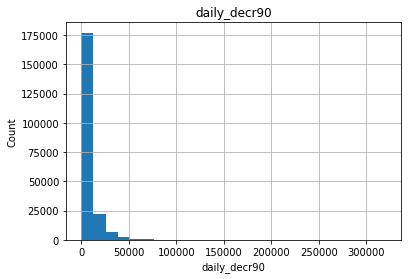

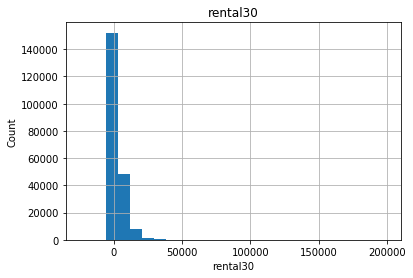

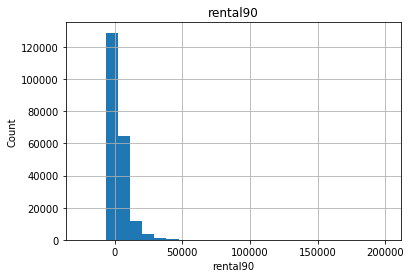

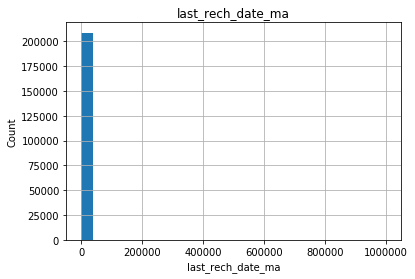

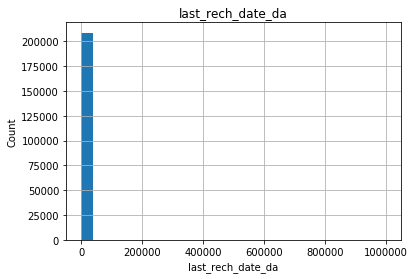

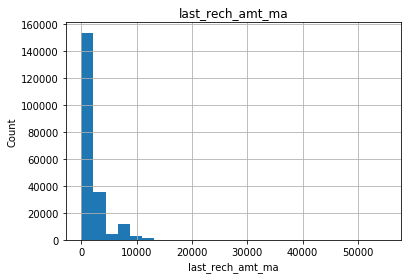

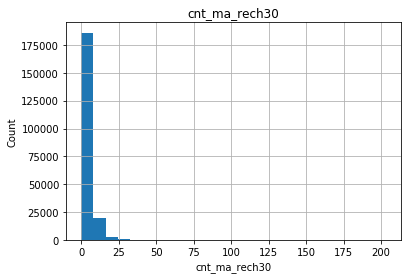

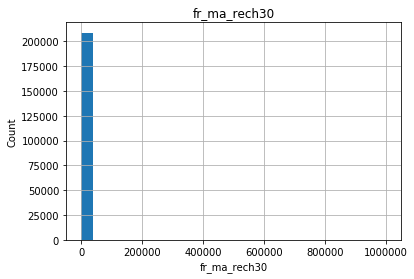

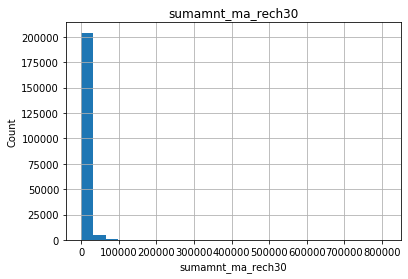

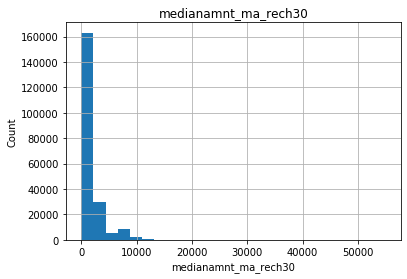

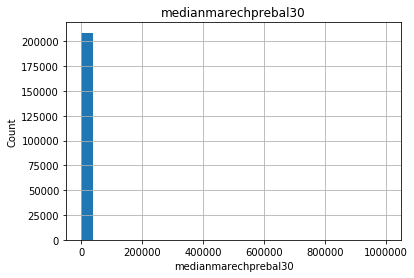

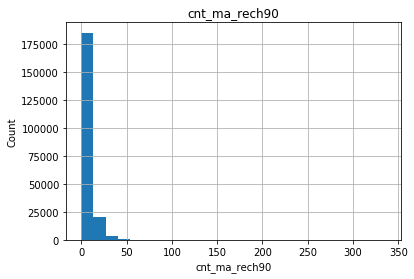

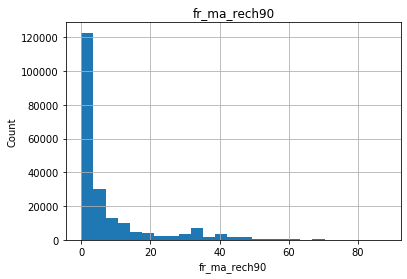

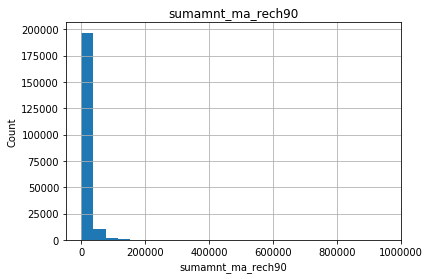

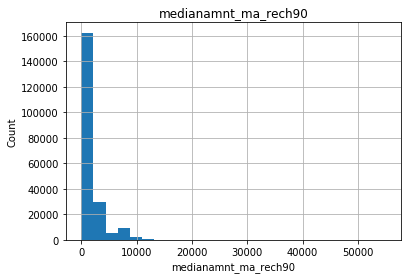

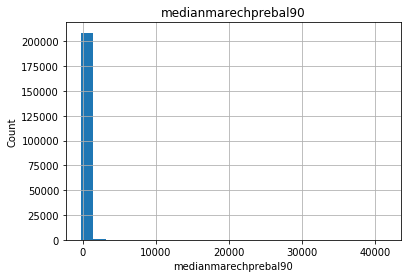

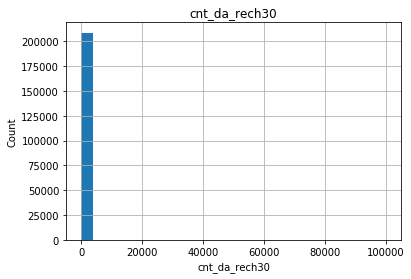

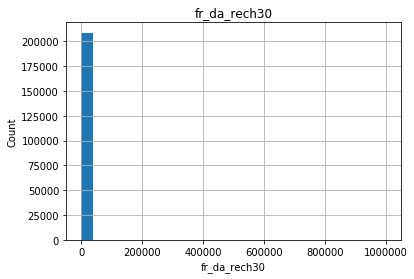

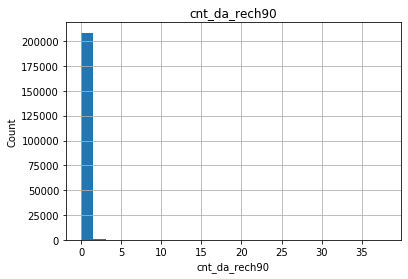

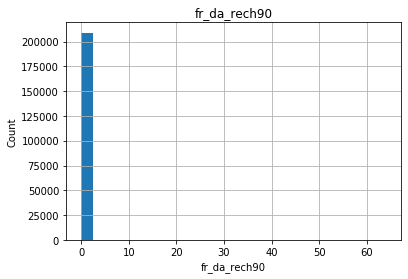

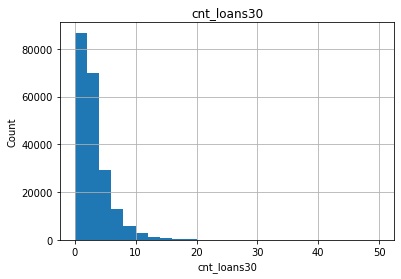

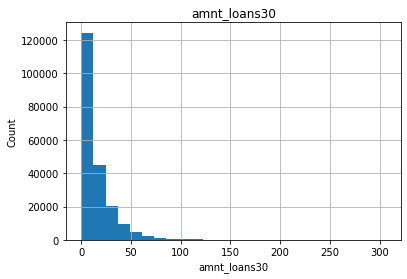

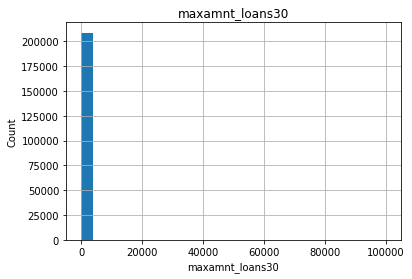

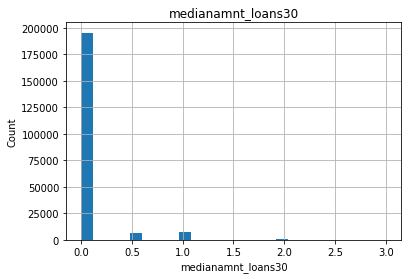

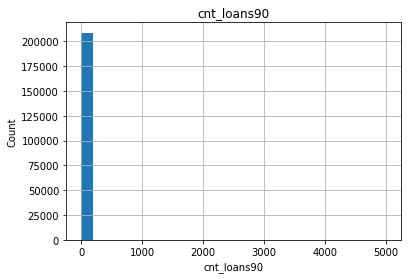

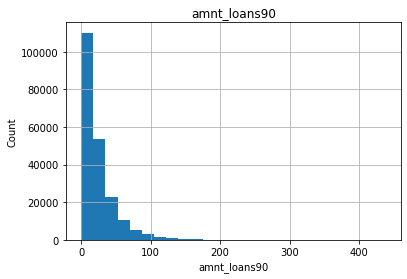

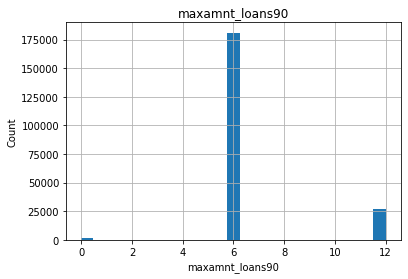

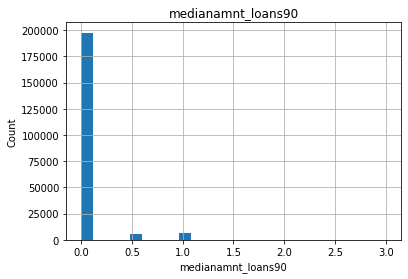

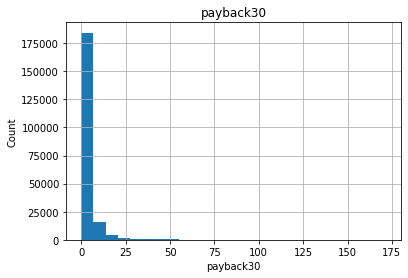

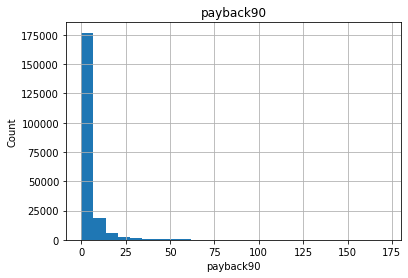

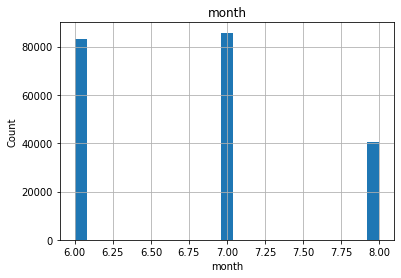

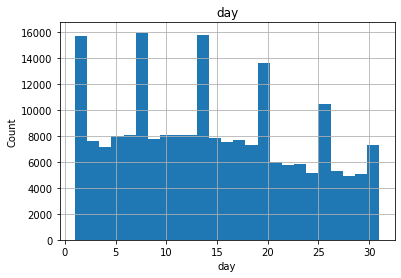

In [15]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for i in df:
    data=df.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

Observation: On observing the histogram of each feature, we can see that data is highly skewed. So, we need to scale the data.

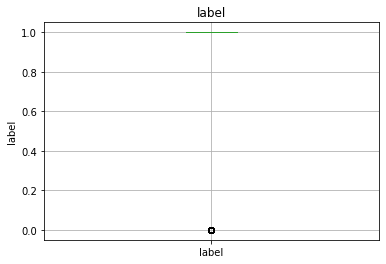

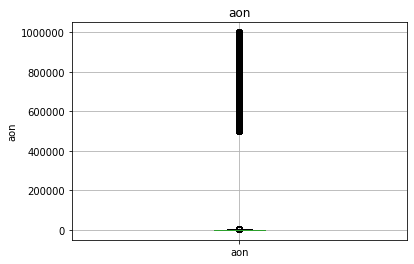

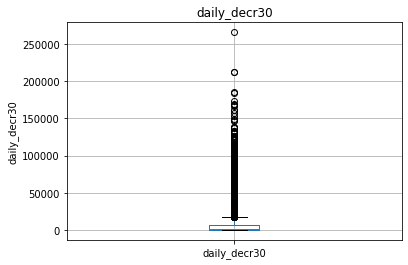

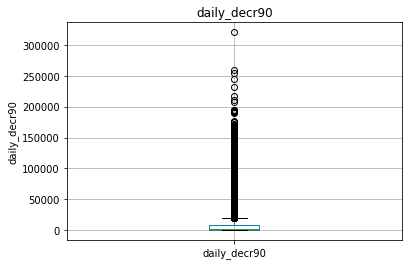

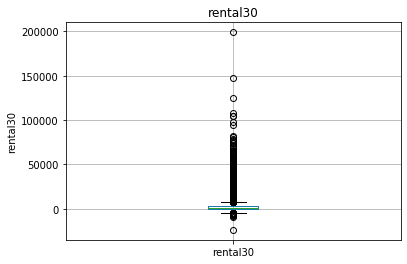

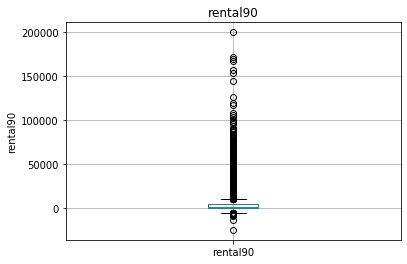

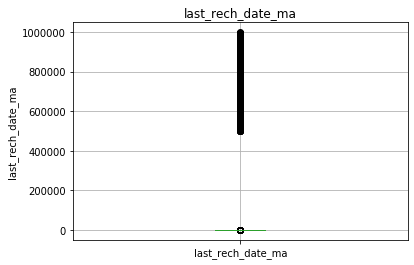

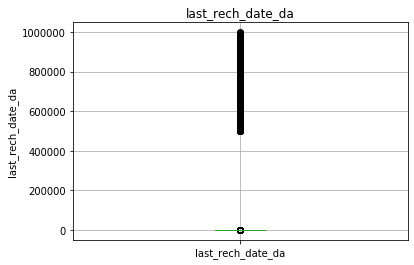

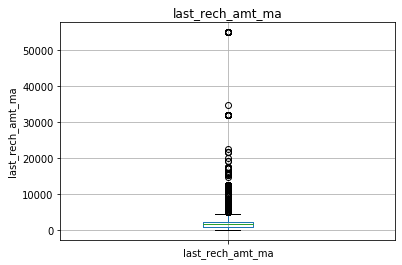

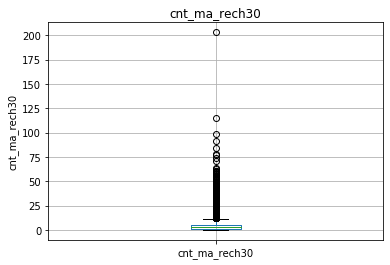

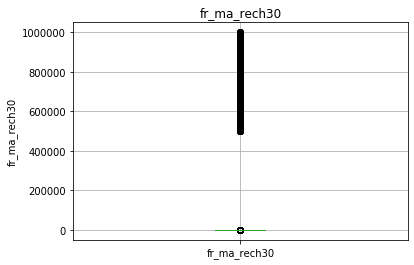

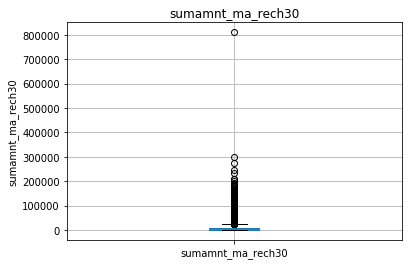

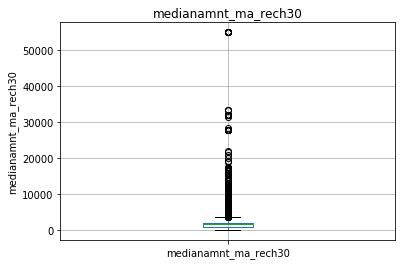

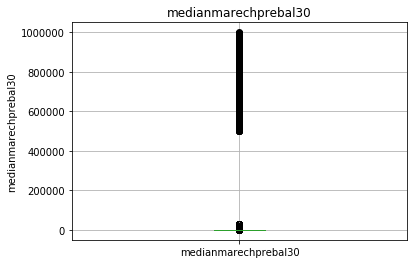

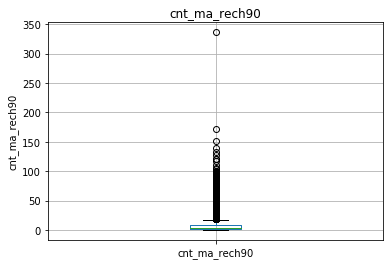

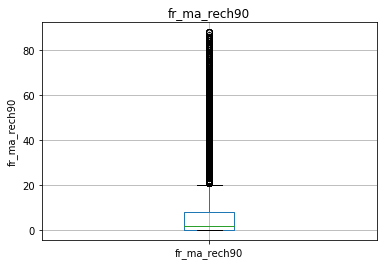

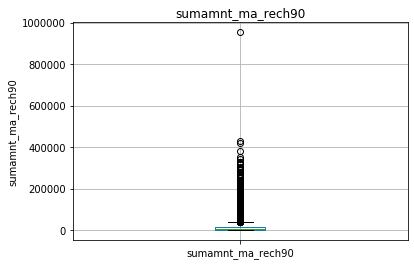

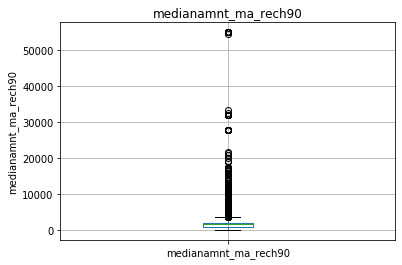

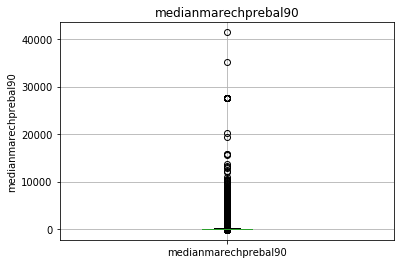

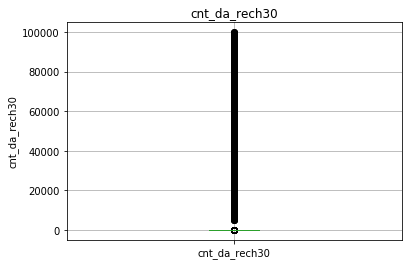

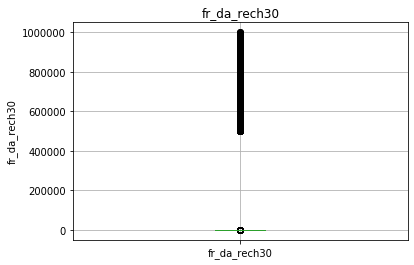

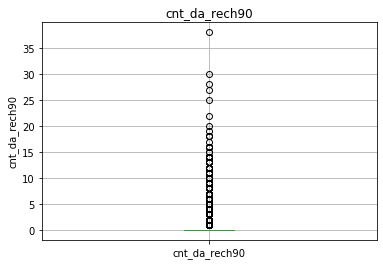

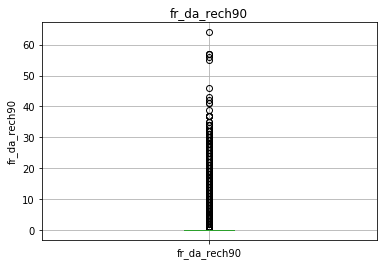

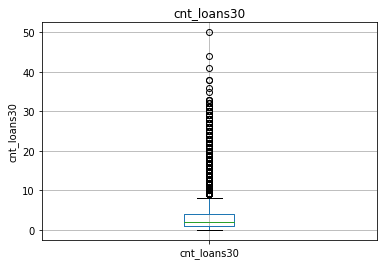

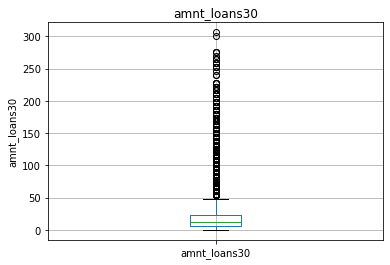

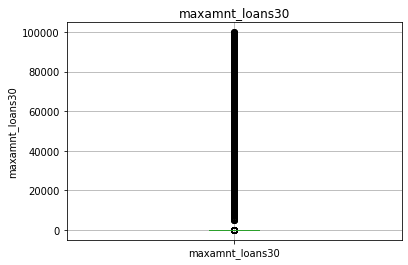

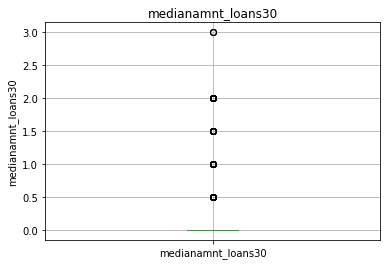

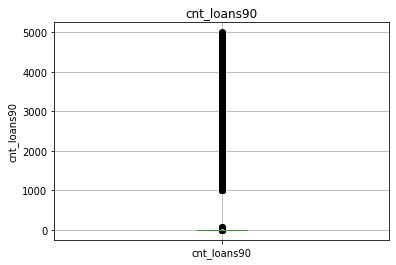

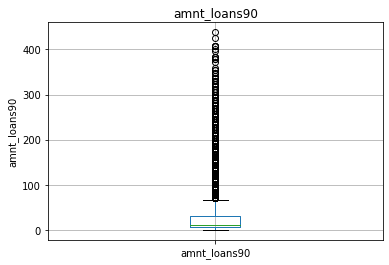

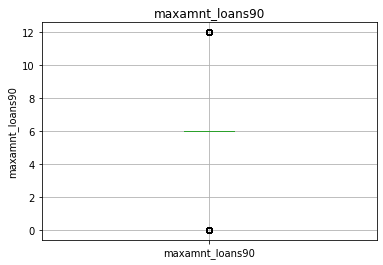

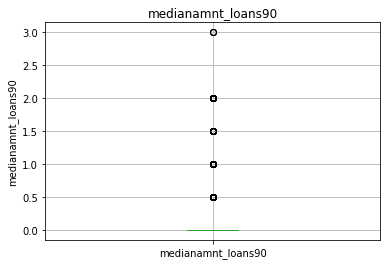

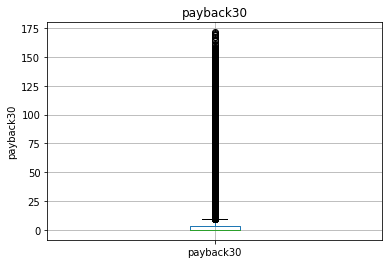

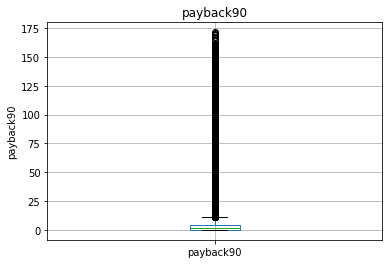

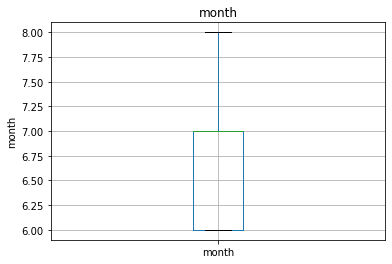

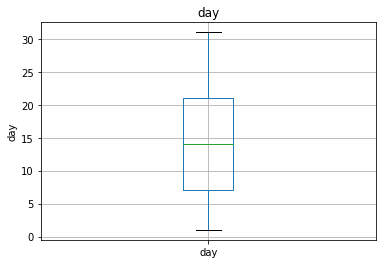

In [16]:
for i in df:
    data=df.copy()    
    data.boxplot(column=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

Observation:Here, we can see that their are alot of outlier values in the given data set. So, we need to handle it.

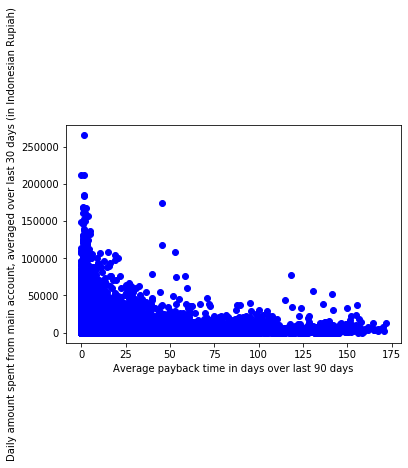

In [15]:
plt.scatter(df['payback90'], df['daily_decr30'], c ="blue")
plt.xlabel("Average payback time in days over last 90 days")
plt.ylabel("Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)") 
# To show the plot
plt.show()

3.	Maximum people returned the amount in less time, however very few were taking longer time to return.

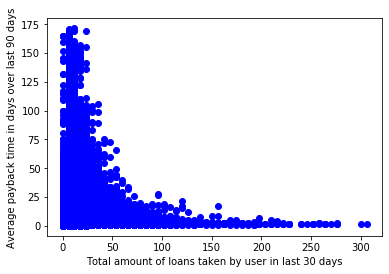

In [11]:
plt.scatter(df['amnt_loans30'], df['payback90'], c ="blue")
plt.xlabel("Total amount of loans taken by user in last 30 days")
plt.ylabel("Average payback time in days over last 90 days")
  
# To show the plot
plt.show()

Observation: Here, we can see that more people are taking lower amount upto 100. However, very few are there who are taking more than 100 amount.

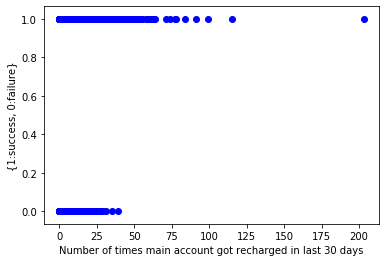

In [12]:
plt.scatter(df['cnt_ma_rech30'], df['label'], c ="blue")
plt.xlabel("Number of times main account got recharged in last 30 days")
plt.ylabel("{1:success, 0:failure}")
  
# To show the plot
plt.show()

# Outlier Removal

In [17]:
#removing outlier
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 2.39409346, 0.27336037,
        0.6637208 ],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.41923266, 1.62209905,
        0.52127058],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.41923266, 1.62209905,
        0.54522166],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.04735622, 0.27336037,
        1.73021304],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.59938541, 0.27336037,
        1.25621649],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.41923266, 0.27336037,
        0.87676799]])

In [18]:
threshold=3
print(np.where (z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [19]:
#removing outliers
df_new=df[(z<3).all(axis=1)]

In [20]:
df_new.shape

(161465, 35)

In [21]:
df.shape

(209593, 35)

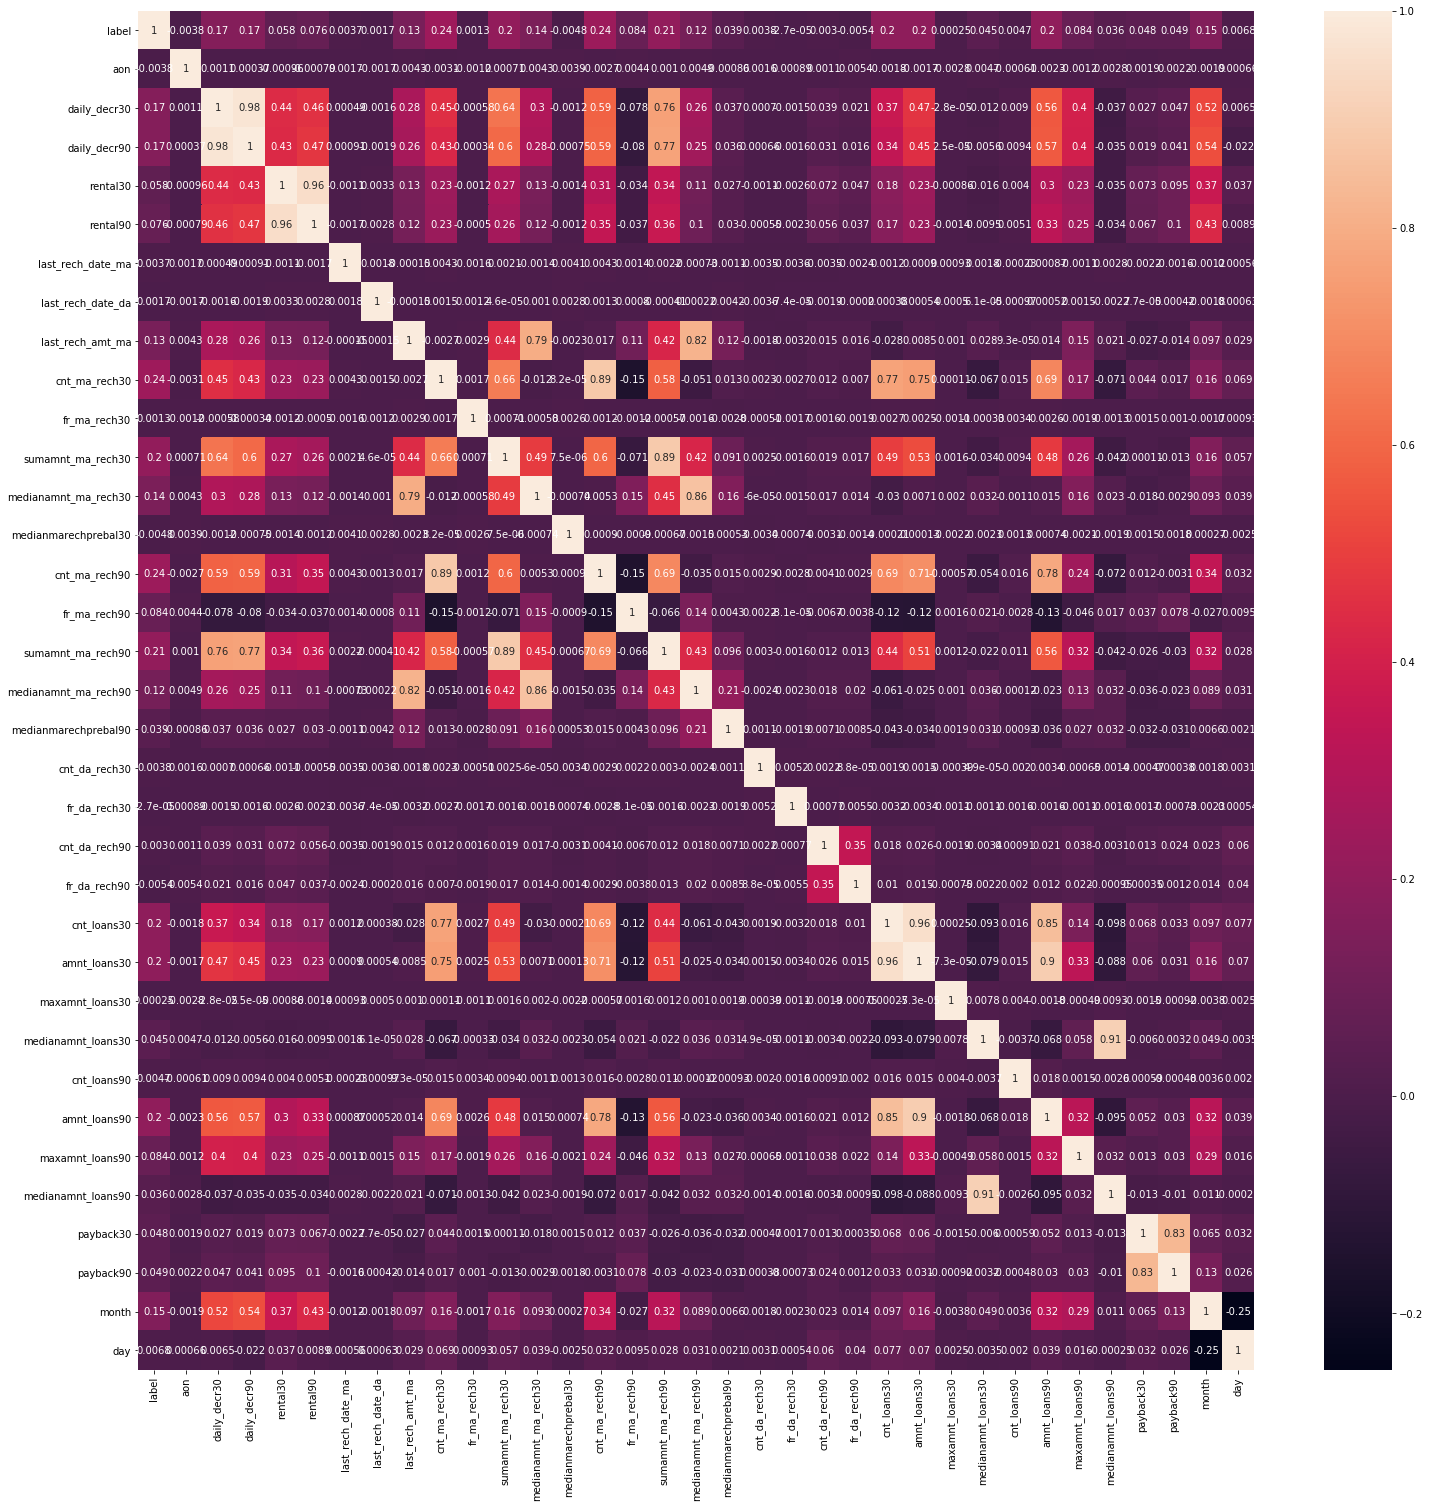

In [22]:
corr_hmap=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation: Here, we can see that some of the features are very less correlated that are 'fr_da_rech90','maxamnt_loans30','cnt_da_rech30','cnt_da_rech90','last_rech_date_da','maxamnt_loans90','medianamnt_loans90','medianamnt_loans30'.

# Feature Scaling

In [23]:
#Values are present in very high range. So, we need to scale it.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_new)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
scaler.transform(df_new)

array([[0.        , 0.12861736, 0.09367579, ..., 0.82386364, 0.5       ,
        0.63333333],
       [1.        , 0.30546624, 0.36794353, ..., 0.        , 1.        ,
        0.3       ],
       [1.        , 0.23432476, 0.0435514 , ..., 0.        , 1.        ,
        0.6       ],
       ...,
       [1.        , 0.42644695, 0.35950739, ..., 0.10890152, 0.5       ,
        0.93333333],
       [1.        , 0.71543408, 0.37902163, ..., 0.29829545, 0.5       ,
        0.8       ],
       [1.        , 0.65474277, 0.13706254, ..., 0.        , 0.5       ,
        0.2       ]])

In [25]:
#splitting data into independent and dependent features
x=df_new.drop(['label'],axis=1)
y=df_new['label']

# Feature Selection

In [47]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(x,y)
etr_model.feature_importances_

array([0.05733598, 0.11991129, 0.12193529, 0.04354917, 0.04285239,
       0.03850206, 0.00179812, 0.0215257 , 0.03720019, 0.01571971,
       0.04216896, 0.02225254, 0.02642649, 0.04916774, 0.02348684,
       0.03786022, 0.0218897 , 0.03344161, 0.00108478, 0.        ,
       0.00212652, 0.        , 0.01031822, 0.01532873, 0.00085305,
       0.00181246, 0.01003031, 0.02314574, 0.00216824, 0.0018838 ,
       0.0095345 , 0.01410865, 0.05621533, 0.09436568])

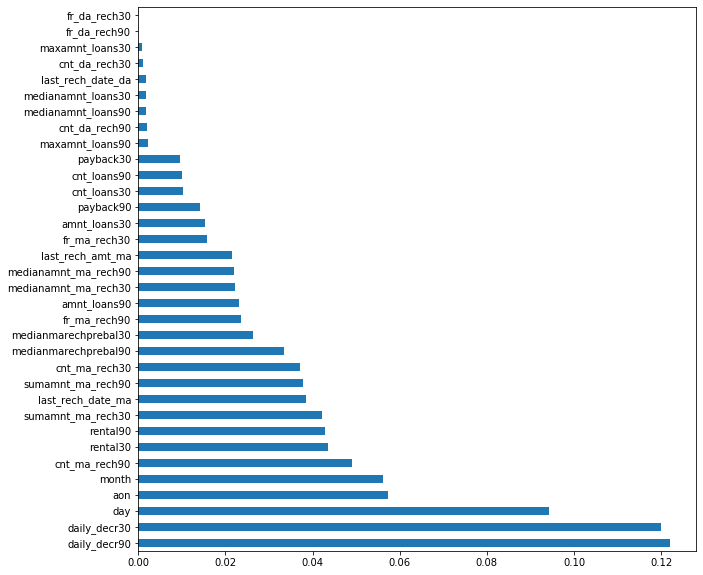

In [48]:
feature_imp = pd.Series(etr_model.feature_importances_,index=x.columns)
feature_imp.nlargest(37).plot(kind='barh',figsize=(10,10))

# PCA(dimensionality reduction)

In [26]:
#Here we can see that there are many features present in the dataset. So to reduce its dimensions we can apply PCA tecnique so that our model will learn better.
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
x_pca=pca.transform(df_new)

In [28]:
x1=df_new.drop(['label','fr_da_rech90','maxamnt_loans30','cnt_da_rech30','cnt_da_rech90','last_rech_date_da','maxamnt_loans90','medianamnt_loans90','medianamnt_loans30'],axis=1)

# Train/Test Split

In [29]:
#importing models and metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [57]:
#finding best randomstate for train test split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=accuracy_score(y_test,y_pred)
        print("accuracy score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max accuracy score corresponding to",final_r_state,"is",max_r_score)  
    return final_r_state

In [58]:
#finding best random state
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
r_state=maxr2_score(regr,x1,y)

accuracy score corresponding to 42 is 0.8652958845570248
accuracy score corresponding to 43 is 0.864769454680581
accuracy score corresponding to 44 is 0.864088192487536
accuracy score corresponding to 45 is 0.8623231040782832
accuracy score corresponding to 46 is 0.8643049577307775
accuracy score corresponding to 47 is 0.8642739912674573
accuracy score corresponding to 48 is 0.8627256681014461
accuracy score corresponding to 49 is 0.8650791193137831
accuracy score corresponding to 50 is 0.8632211315145697
accuracy score corresponding to 51 is 0.8654816833369461
accuracy score corresponding to 52 is 0.8634998296844517
accuracy score corresponding to 53 is 0.863530796147772
accuracy score corresponding to 54 is 0.8621992382250023
accuracy score corresponding to 55 is 0.8678351345492831
accuracy score corresponding to 56 is 0.8597528876227046
accuracy score corresponding to 57 is 0.8650791193137831
accuracy score corresponding to 58 is 0.8664416436998731
accuracy score corresponding to 59

In [30]:
#dividing the data into train and test by using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=55)

In [31]:
#Importing models for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunning by using GridSearchCV¶

In [61]:
#parameters for knn
neighbors={"n_neighbors":range(1,20)}
knc=KNeighborsClassifier()
gknc=GridSearchCV(knc,neighbors,cv=10)
gknc.fit(x1,y)
gknc.best_params_

{'n_neighbors': 17}

In [62]:
#parameters for random forest
rfc = RandomForestClassifier()
param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(rfc, param_grid, n_jobs=-1, cv=5)

grid.fit(x1, y)
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 30}

In [63]:
#best parameters for AdaBoostClassifier
n_estimators={"n_estimators":range(1,25)}
adc=AdaBoostClassifier()
gadc=GridSearchCV(adc,n_estimators,cv=10)
gadc.fit(x1,y)
gadc.best_params_

{'n_estimators': 24}

In [64]:
#best parameters for decisiontreeclassifier
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtc=DecisionTreeClassifier()    
gdtc=GridSearchCV(dtc, param_grid, cv=5)
gdtc.fit(x1, y)
gdtc.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [ ]:
#best parameters for support vector classifier
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x1,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

In [ ]:
#best parameter for gradiantboosting classifier
n_estimators={"n_estimators":range(1,25)}
gbc=GradientBoostingClassifier()
gc=GridSearchCV(gbc,n_estimators,cv=10)
gc.fit(x1,y)
gc.best_params_

In [32]:
#fitting best parameters
knc=KNeighborsClassifier(n_neighbors=17)
svc=SVC(C= 1, kernel='rbf')
dtc=DecisionTreeClassifier(criterion='gini', max_depth=10)
rfc=RandomForestClassifier(bootstrap= True, max_features='auto',min_samples_split= 8,n_estimators=30)
adc=AdaBoostClassifier(n_estimators=24)
gbc=GradientBoostingClassifier(n_estimators=24)
gb=GaussianNB()
lr=LogisticRegression()

# Model Evaluation

In [33]:
models=[]
models.append(('KNeighborsClassifier',knc))

models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifierClassifier',adc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('LogisticRegression',lr))

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc

***************** KNeighborsClassifier **********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')


Accuracy_score= 0.8864679221912564


Cross_val_score= 0.8818381862181894


roc_auc_score= 0.6688620515498127


classification_report
               precision    recall  f1-score   support

           0       0.64      0.37      0.47      4803
           1       0.91      0.97      0.94     30720

    accuracy                           0.89     35523
   macro avg       0.77      0.67      0.70     35523
weighted avg       0.87      0.89      0.87     35523



[[ 1780  3023]
 [ 1010 29710]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


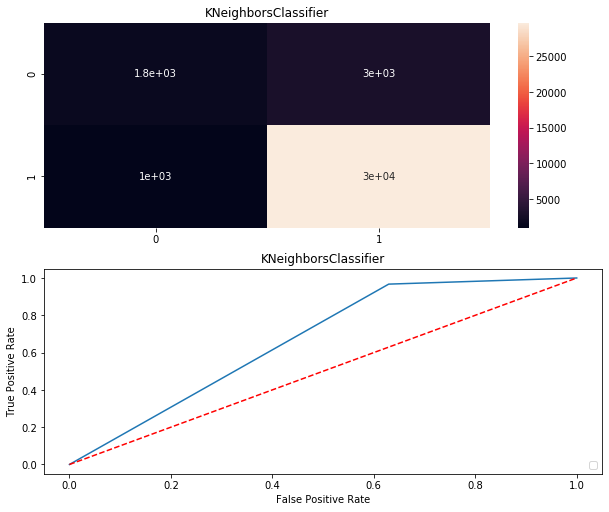




***************** RandomForestClassifier **********************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score= 0.92027700363145


Cross_val_score= 0.9170346605985479


roc_auc_score= 0.7651691183407505


classification_report
               precision    recall  f1-score   support

           0       0.80      0.55      0.65      4803
           1       0.93      0.98      0.95     30720

    accuracy                           0.92     35523
   macro avg       0.86      0.77

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


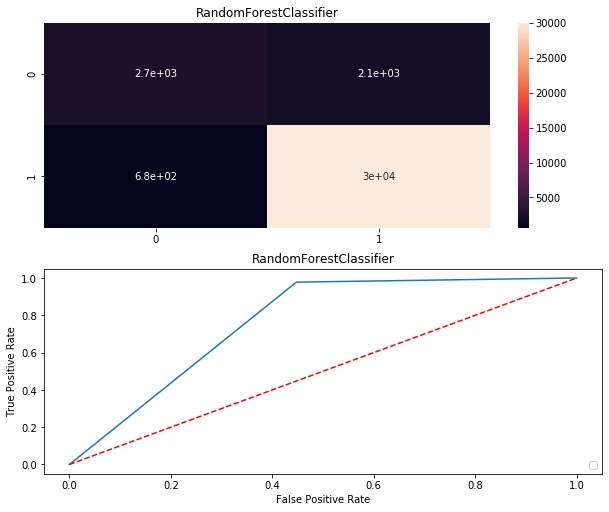




***************** AdaBoostClassifierClassifier **********************


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=24, random_state=None)


Accuracy_score= 0.902373110379191


Cross_val_score= 0.9008577460069326


roc_auc_score= 0.6957109529525818


classification_report
               precision    recall  f1-score   support

           0       0.75      0.41      0.53      4803
           1       0.91      0.98      0.95     30720

    accuracy                           0.90     35523
   macro avg       0.83      0.70      0.74     35523
weighted avg       0.89      0.90      0.89     35523



[[ 1981  2822]
 [  646 30074]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


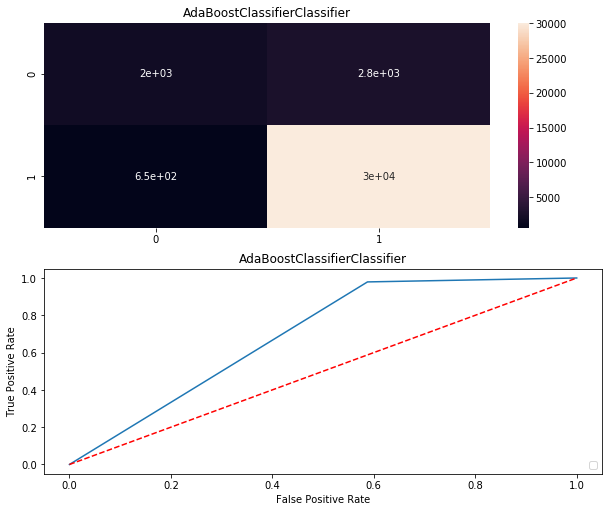




***************** DecisionTreeClassifier **********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy_score= 0.9157728795428314


Cross_val_score= 0.9136345488680423


roc_auc_score= 0.7634432072890642


classification_report
               precision    recall  f1-score   support

           0       0.76      0.55      0.64      4803
           1       0.93      0.97      0.95     30720

    accuracy                           0.92     35523
   macro avg       0.85      0.76      0.80     35523
weighted avg       0.91      0.92      0.91     35523



[[ 2664  2139]
 [  853 29867]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


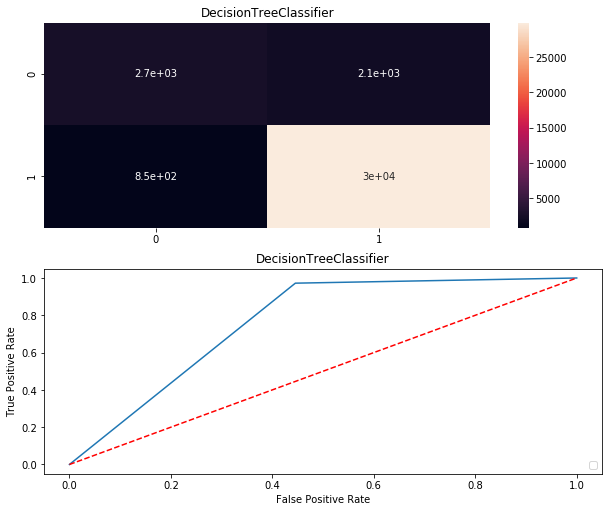




***************** GaussianNB **********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.6482842102299918


Cross_val_score= 0.6578267888106032


roc_auc_score= 0.7358718468600354


classification_report
               precision    recall  f1-score   support

           0       0.26      0.86      0.40      4803
           1       0.96      0.62      0.75     30720

    accuracy                           0.65     35523
   macro avg       0.61      0.74      0.57     35523
weighted avg       0.87      0.65      0.70     35523



[[ 4111   692]
 [11802 18918]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


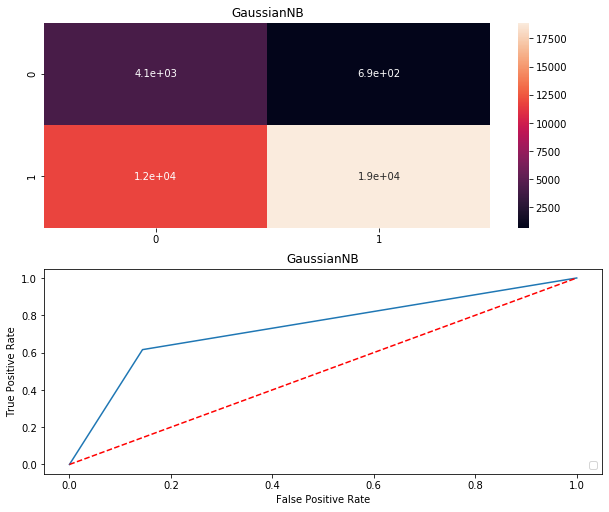




***************** GradientBoostingClassifier **********************


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=24,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Accuracy_score= 0.8995017312726966


Cross_val_score= 0.8962127849429571


roc_auc_score= 0.643551098841219


classification_report
               precision    recall  f1-score   support

           0       0.89      0.29      0.

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


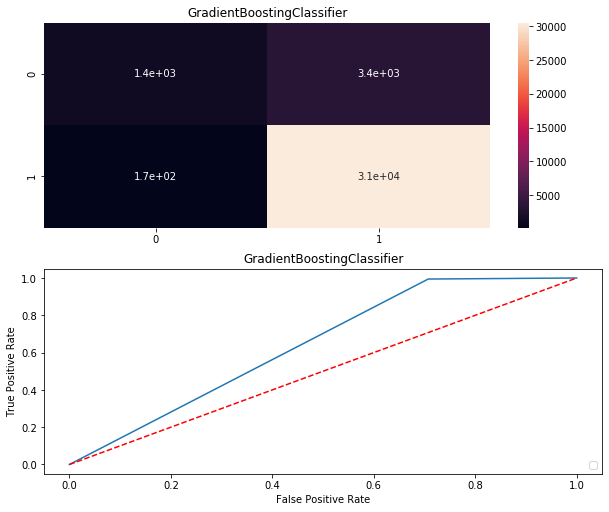




***************** LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.8672690932635194


Cross_val_score= 0.8634131246068852


roc_auc_score= 0.5245304143406465


classification_report
               precision    recall  f1-score   support

           0       0.60      0.05      0.10      4803
           1       0.87      0.99      0.93     30720

    accuracy                           0.87     35523
   macro avg       0.74      0.52      0.51     35523
weighted avg       0.83      0.87      0.82     35523



[[  263  4540]
 [  175 30545]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


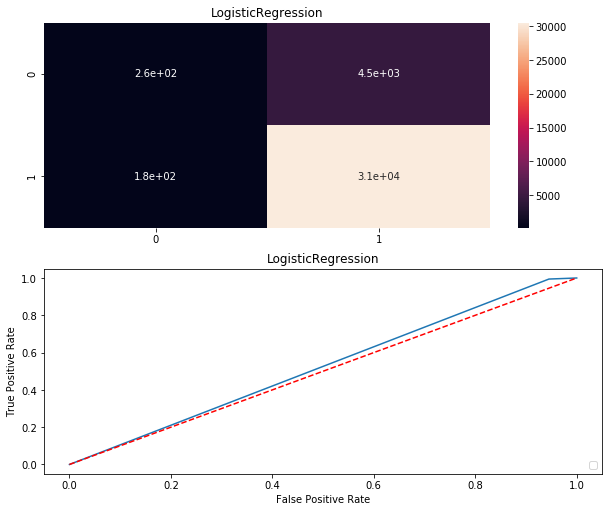

In [35]:
#appling for loop for all the algorithms and also finding its respective roc_curve
Models=[]
score=[]
cvs=[]

rocscore=[]
for name,model in models:
    print('*****************',name,'**********************')
    print('\n')
    Models.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x1,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [36]:
result=pd.DataFrame({'Model':Models,'Accuracy_score':score,'Cross_val_score':cvs,'ROC':rocscore})
result

,Model,Accuracy_score,Cross_val_score,ROC
0,KNeighborsClassifier,88.646792,88.183819,66.886205
1,RandomForestClassifier,92.027700,91.703466,76.516912
2,AdaBoostClassifierClassifier,90.237311,90.085775,69.571095
3,DecisionTreeClassifier,91.577288,91.363455,76.344321
4,GaussianNB,64.828421,65.782679,73.587185
5,GradientBoostingClassifier,89.950173,89.621278,64.355110
6,LogisticRegression,86.726909,86.341312,52.453041


# Saving Model

In [37]:
from sklearn.externals import joblib
joblib.dump(rfc,'micro.pkl')

['micro.pkl']